<div class="alert alert-success">
    
## Машинное обучение

## Практическое домашнее задание 3




# Для выполнения домашнего задания №3:

В этом задании вам следует обучить две модели: Логистическая регрессия, RandomForest. По всем обученным моделям должен быть проведен подбор параметров, и, при необходимости, применены инструменты для борьбы с переобучением.
 В качестве основной метрики, с помощью которой следует сравнивать производительность моделей, использовать площадь под ROC-кривой (AUC-ROC).
 Перед выполнением всех экспериментов и выбора лучшей модели, определите как вы будете оценивать качество: на тестовых данных, которые могут быть получены с помощью кросс-валидации или предварительно отобранной тестовой выборки из таблицы `features.csv`.
Не забываем, что в любом случае подбор гиперпараметров должен проводиться на кроссвалидации. После того, как найдете лучшие гиперпараметры с помощью GridSearch, инициализируйте модель с найденными лучшими гиперпараметрами. 

Для решения задания вам требуется выполнить следующие шаги:

1. Проведите EDA, не забудьте масштабировать данные, если это требуется. (1 балл)
2. Оцените качество моделей с помощью кросс-валидации, подберите при этом лучшие параметры. (2 балла, каждый по 0.5 с учётом ответов на вопросы)
  - Как долго проводилась кросс-валидация каждой выбранной вами модели? Инструкцию по измерению времени можно найти ниже по тексту.
  - Какое качество при этом получилось? В данном задании мы используем метрику качества AUC-ROC.
  - Как оно соотносится с качеством другой модели? Чем вы можете объяснить эту разницу?
  - Быстрее ли работает, Случайный лес по сравнению с Логистической регрессией? Время замерьте с помощью кода ниже.

3. Постройте предсказания вероятностей получения положительного класса для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. модель не получилась константной).  (1 балл)

4. В качестве метрики использовать площадь под ROC-кривой (AUC-ROC). Построить матрицу ошибок (Confusion Matrix). (1 балл)
5. Как правило исходно в задачах автоматически используется порог (threshold) равный 0.5, но мы можем его менять. (3 балла)

    - Как увеличение порога отразится на precision/recall?  
    На практике, перед нами всегда встает trade-off: уменьшить полноту взамен на большую точность или получить больше ложно положительных примеров взамен на больший recall.
    - Постройте на одном графике precision, recall и f1 score в зависимости от порога.
    - Найдите порог, который соответствует максимизации f1 score.

6.  Провести интерпретацию признаков с помощью `_features_importances/permutation_importance`, постройте bar plot. На основе полученных результатов описать выводы. (2 балла)  


**Обратите внимание**: высокое качество работы на кросс-валидации (близкое к 100\%) — это в первую очередь повод задуматься о том, правильно ли вы обучаете модель. Например, возможно, вы заглядываете в будущее.

*Немного о метрике качества:*

 `AUC-ROC` — это метрика качества для алгоритма, выдающего оценки принадлежности первому классу. Все три алгоритма — случайный лес, SVM и логистическая регрессия — умеют выдавать такие оценки. Для этого нужно получать предсказания с помощью функции predict\_proba. Эта функция возвращает два столбца: первый содержит оценки принадлежности нулевому классу, второй — первому классу. Вам нужны значения из второго столбца:

```
pred = model.predict_proba(X_test)[:, 1]
```

**Измерение времени работы кода**
```  
import time
import datetime

start_time = datetime.datetime.now()

time.sleep(3) # place the piece of code to be measured here

print 'Time elapsed:', datetime.datetime.now() - start_time
```

**Рекомендации и советы**

Если все работает очень медленно:

  - Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
  - Попробуйте упростить модель — например, уменьшить глубину деревьев в (max\_depth).

# Описание задачи

## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](http://dota2.gamepedia.com/Game_modes/ru), мы будем рассматривать режим [Captain's Mode](http://dota2.gamepedia.com/Game_modes/ru#Captain.27s_Mode), в формате которого происходит большая часть киберспортивных мероприятий по Dota 2.

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

![](http://imgur.com/XFr4HYE.jpg)

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

![](http://imgur.com/5b0SlQb.jpg)

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

![](http://imgur.com/Du79Kzf.jpg)

Признаки, представленные в таблице features.csv, по мнению экспертов в предметной области являются наиболее важными для решения задачи предсказания победы команды. Тем не менее, не обязательно использовать эти признаки в исходном виде для применения методов машинного обучения — вы можете сделать новые признаки из имеющихся.

*Материал частично базируется на задаче по соревнованию Kaggle Dota 2 Win Probability Prediction, проводимом в рамках проекта курса по Машинному Обучению на платформе Coursera.*

### Пример чтения файла с признаками

In [96]:
import pandas as pd

features = pd.read_csv("./features.csv", index_col="match_id")

features

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,1,47,4,1706,1198,17,0,1,8,...,4,3,0,-24.0,2032,0,1792,1975,48,63
114403,1450277704,0,43,4,1793,1416,17,0,1,5,...,3,2,0,-17.0,1734,1,2038,6,63,3
114404,1450291848,1,98,4,1399,540,1,0,0,5,...,1,3,1,-15.0,2906,0,1796,1846,51,63


In [97]:
# Просто принт всех имен колонок
for column in features.columns:
    print(column)

start_time
lobby_type
r1_hero
r1_level
r1_xp
r1_gold
r1_lh
r1_kills
r1_deaths
r1_items
r2_hero
r2_level
r2_xp
r2_gold
r2_lh
r2_kills
r2_deaths
r2_items
r3_hero
r3_level
r3_xp
r3_gold
r3_lh
r3_kills
r3_deaths
r3_items
r4_hero
r4_level
r4_xp
r4_gold
r4_lh
r4_kills
r4_deaths
r4_items
r5_hero
r5_level
r5_xp
r5_gold
r5_lh
r5_kills
r5_deaths
r5_items
d1_hero
d1_level
d1_xp
d1_gold
d1_lh
d1_kills
d1_deaths
d1_items
d2_hero
d2_level
d2_xp
d2_gold
d2_lh
d2_kills
d2_deaths
d2_items
d3_hero
d3_level
d3_xp
d3_gold
d3_lh
d3_kills
d3_deaths
d3_items
d4_hero
d4_level
d4_xp
d4_gold
d4_lh
d4_kills
d4_deaths
d4_items
d5_hero
d5_level
d5_xp
d5_gold
d5_lh
d5_kills
d5_deaths
d5_items
first_blood_time
first_blood_team
first_blood_player1
first_blood_player2
radiant_bottle_time
radiant_courier_time
radiant_flying_courier_time
radiant_tpscroll_count
radiant_boots_count
radiant_ward_observer_count
radiant_ward_sentry_count
radiant_first_ward_time
dire_bottle_time
dire_courier_time
dire_flying_courier_time
dire

##### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier"
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier"
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`
      

# Набор данных

Набор данных с матчами записан в файле matches.jsonlines.bz2. В каталоге dictionaries приведены расшифровки идентификаторов, которые присутствуют в записях матчей.

Чтение информации о матчах
Информация о матчах записана в сжатом текстовом файле matches.jsonlines.bz2, каждая строчка которого содержит объект в формате JSON. Запись в формате JSON преобразуется в python-объект при помощи стандартного модуля json. Пример чтения матчей:


In [98]:
import json

f = open("dictionaries/heroes.json")
data = json.load(f)
f.close()

data["14"]

{'id': 14,
 'name': 'npc_dota_hero_pudge',
 'localized_name': 'Pudge',
 'primary_attr': 'str',
 'attack_type': 'Melee',
 'roles': ['Disabler', 'Initiator', 'Durable', 'Nuker'],
 'img': '/apps/dota2/images/heroes/pudge_full.png?',
 'icon': '/apps/dota2/images/heroes/pudge_icon.png',
 'base_health': 200,
 'base_health_regen': 1.5,
 'base_mana': 75,
 'base_mana_regen': 0.9,
 'base_armor': -1,
 'base_mr': 25,
 'base_attack_min': 27,
 'base_attack_max': 33,
 'base_str': 25,
 'base_agi': 14,
 'base_int': 14,
 'str_gain': 3.5,
 'agi_gain': 1.5,
 'int_gain': 1.5,
 'attack_range': 150,
 'projectile_speed': 0,
 'attack_rate': 1.7,
 'move_speed': 280,
 'turn_rate': 0.7,
 'cm_enabled': True,
 'legs': 2}

### Выполнение работы

## EDA

Из эмпирических наблюдений мы можем заметить, что некоторые признаки не вляют на предсказание модели о победе стороны (radiant) до 5ой минуты, поскольку или вообще не влияют на исход игры (duration) или появляются слишком поздно (tower status). Такие признаки мы выкинем из нашего датасета в первую очередь. Они представлены ниже.

In [99]:
# выкидываем бесполезные признаки
features = features.drop(
    [
        "barracks_status_dire",
        "barracks_status_radiant",
        "duration",
        "tower_status_dire",
        "tower_status_radiant",
        "start_time",
        "lobby_type",
    ],
    axis=1,
)

Магический код от преподавателя для улучшения визуализации.(∩•̀ω•́)⊃-*⋆

In [100]:
# Код для улучшения визуализации
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["font.size"] = 12
plt.rcParams["savefig.format"] = "pdf"
sns.set_style("darkgrid")

Агрегация показателей персонажей. Приводит все значения, которые мы получаем от каждого игрока-персонажа к общекомандному преимуществу.
То есть - суммируем показатели по команде и вычисляем разницу между 2умя командами.

In [101]:
def aggregate_team_stats_with_difference(df, drop_old=True):
    # Список всех показателей
    all_metrics = ["gold", "xp", "lh", "kills", "deaths", "level", "items"]

    for metric in all_metrics:
        # Вычисление разницы между командами для каждой метрики
        df["diff_" + metric] = sum(df[f"r{i}_{metric}"] for i in range(1, 6)) - sum(
            df[f"d{i}_{metric}"] for i in range(1, 6)
        )

        # Удаление старых столбцов
        if drop_old:
            for i in range(1, 6):
                df.drop([f"r{i}_{metric}", f"d{i}_{metric}"], axis=1, inplace=True)

    return df


features = aggregate_team_stats_with_difference(features)

Первым делом построим корреляцию победы команды (radiant) от всех признаков чтобы посмотреть, какие из них еще можно исключить

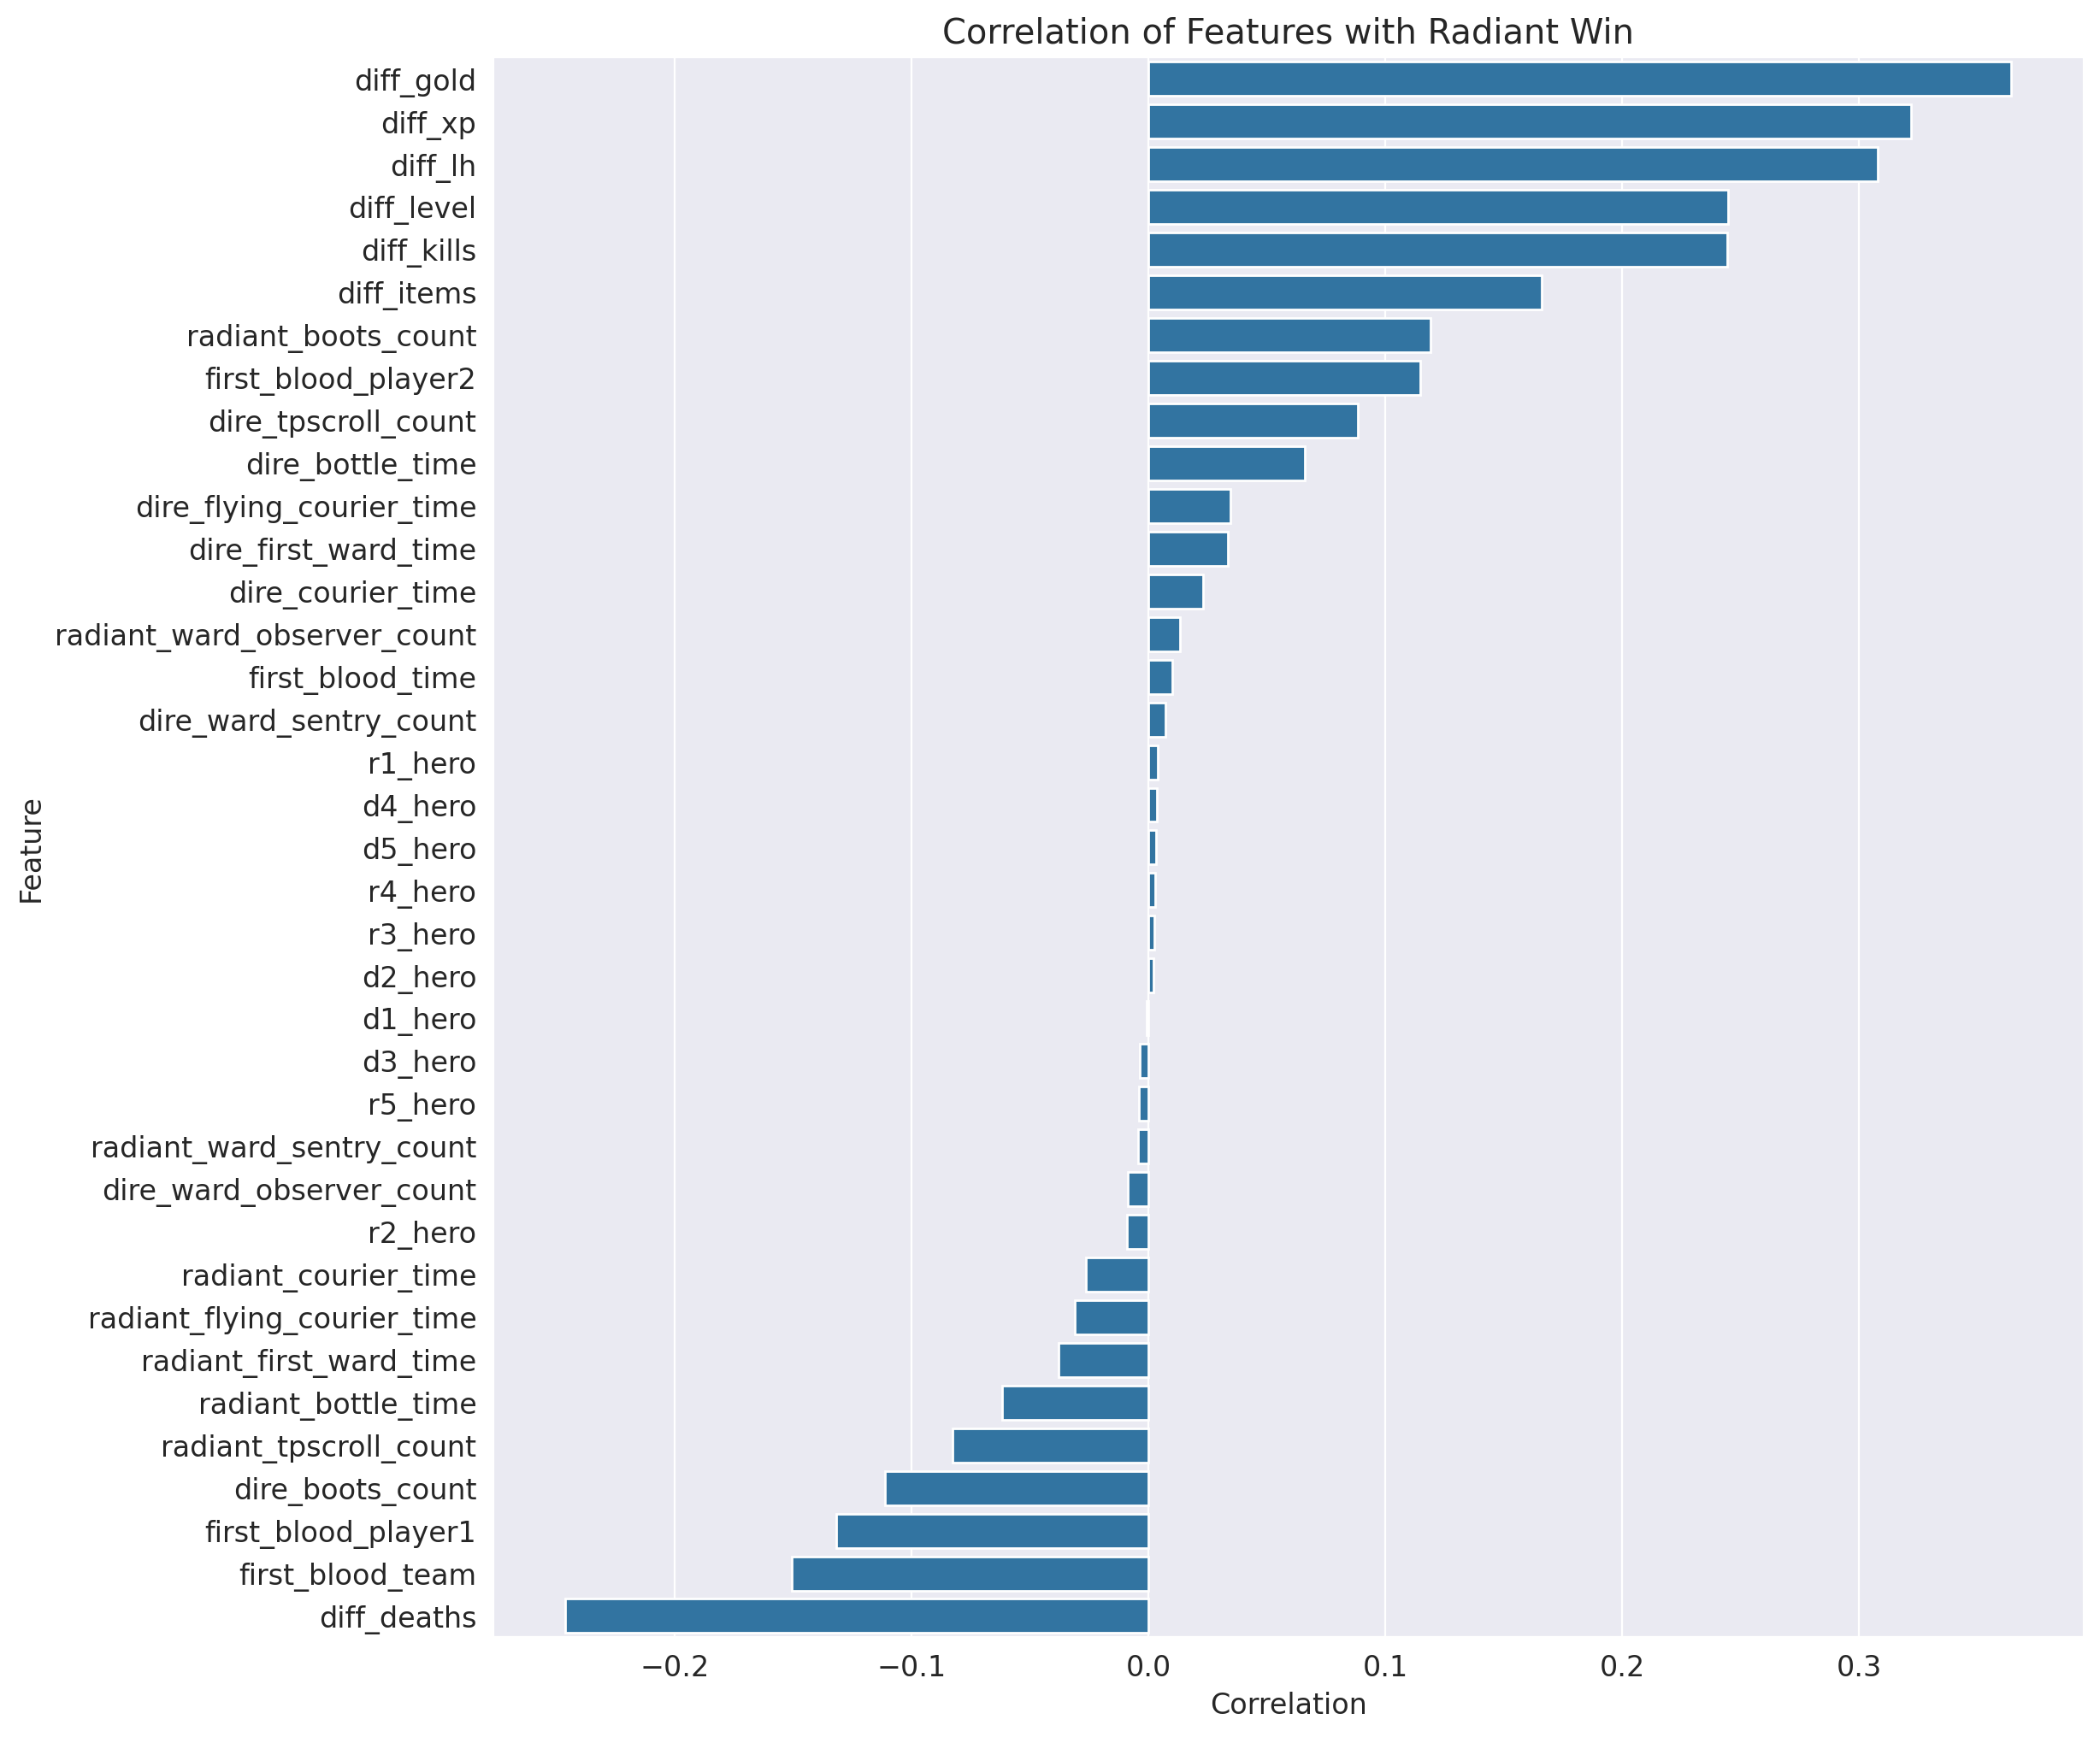

In [102]:
# Вычисление корреляции между признаками и столбцом 'radiant_win'
correlation = features.drop(["radiant_win"], axis=1).corrwith(features["radiant_win"])

correlation_df = pd.DataFrame(
    {"Feature": correlation.index, "Correlation": correlation.values}
)

correlation_df_sorted = correlation_df.sort_values(by="Correlation", ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x="Correlation", y="Feature", data=correlation_df_sorted, orient="h")
# plt.xticks([i * 0.05 for i in range(-6, 8)])
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Features with Radiant Win")
plt.show()

Теперь построим корреляцию между признаками, которые нам кажутся зависимыми. Это diff_gold и diff_items; diff_xp и diff_level

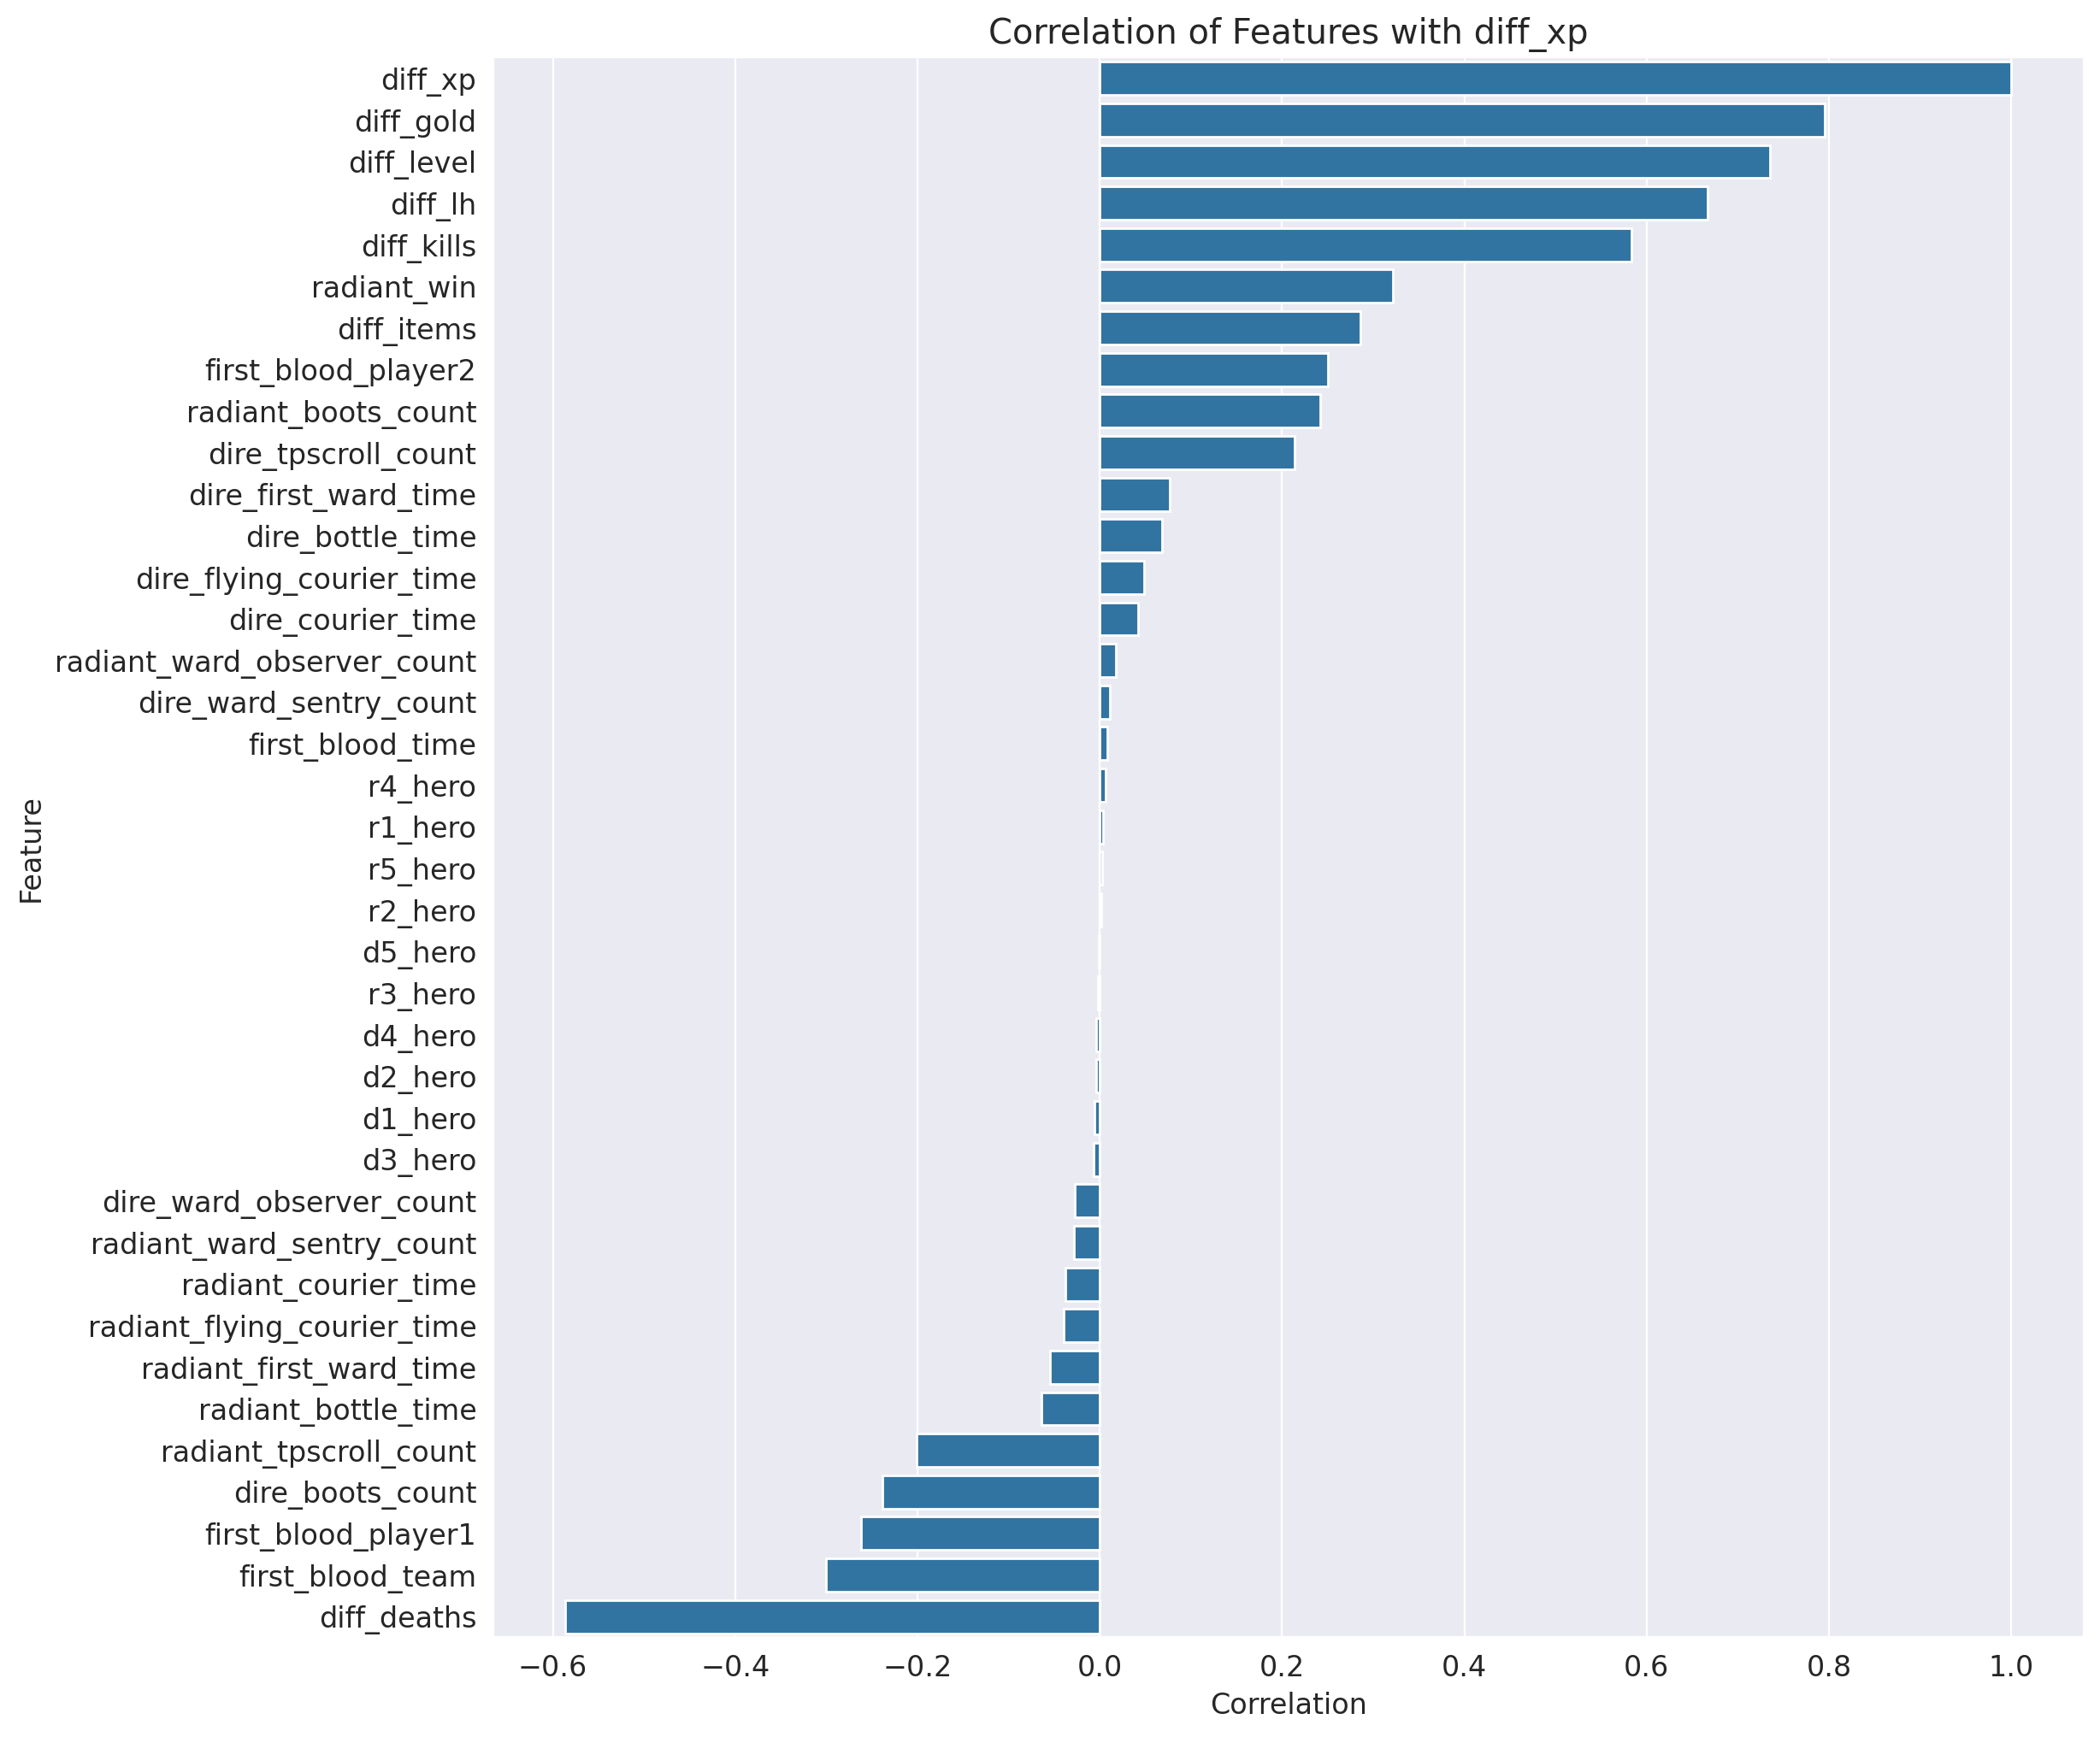

In [103]:
correlation = features.corrwith(features["diff_xp"])

correlation_df = pd.DataFrame(
    {"Feature": correlation.index, "Correlation": correlation.values}
)

correlation_df_sorted = correlation_df.sort_values(by="Correlation", ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x="Correlation", y="Feature", data=correlation_df_sorted, orient="h")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Features with diff_xp")
plt.show()

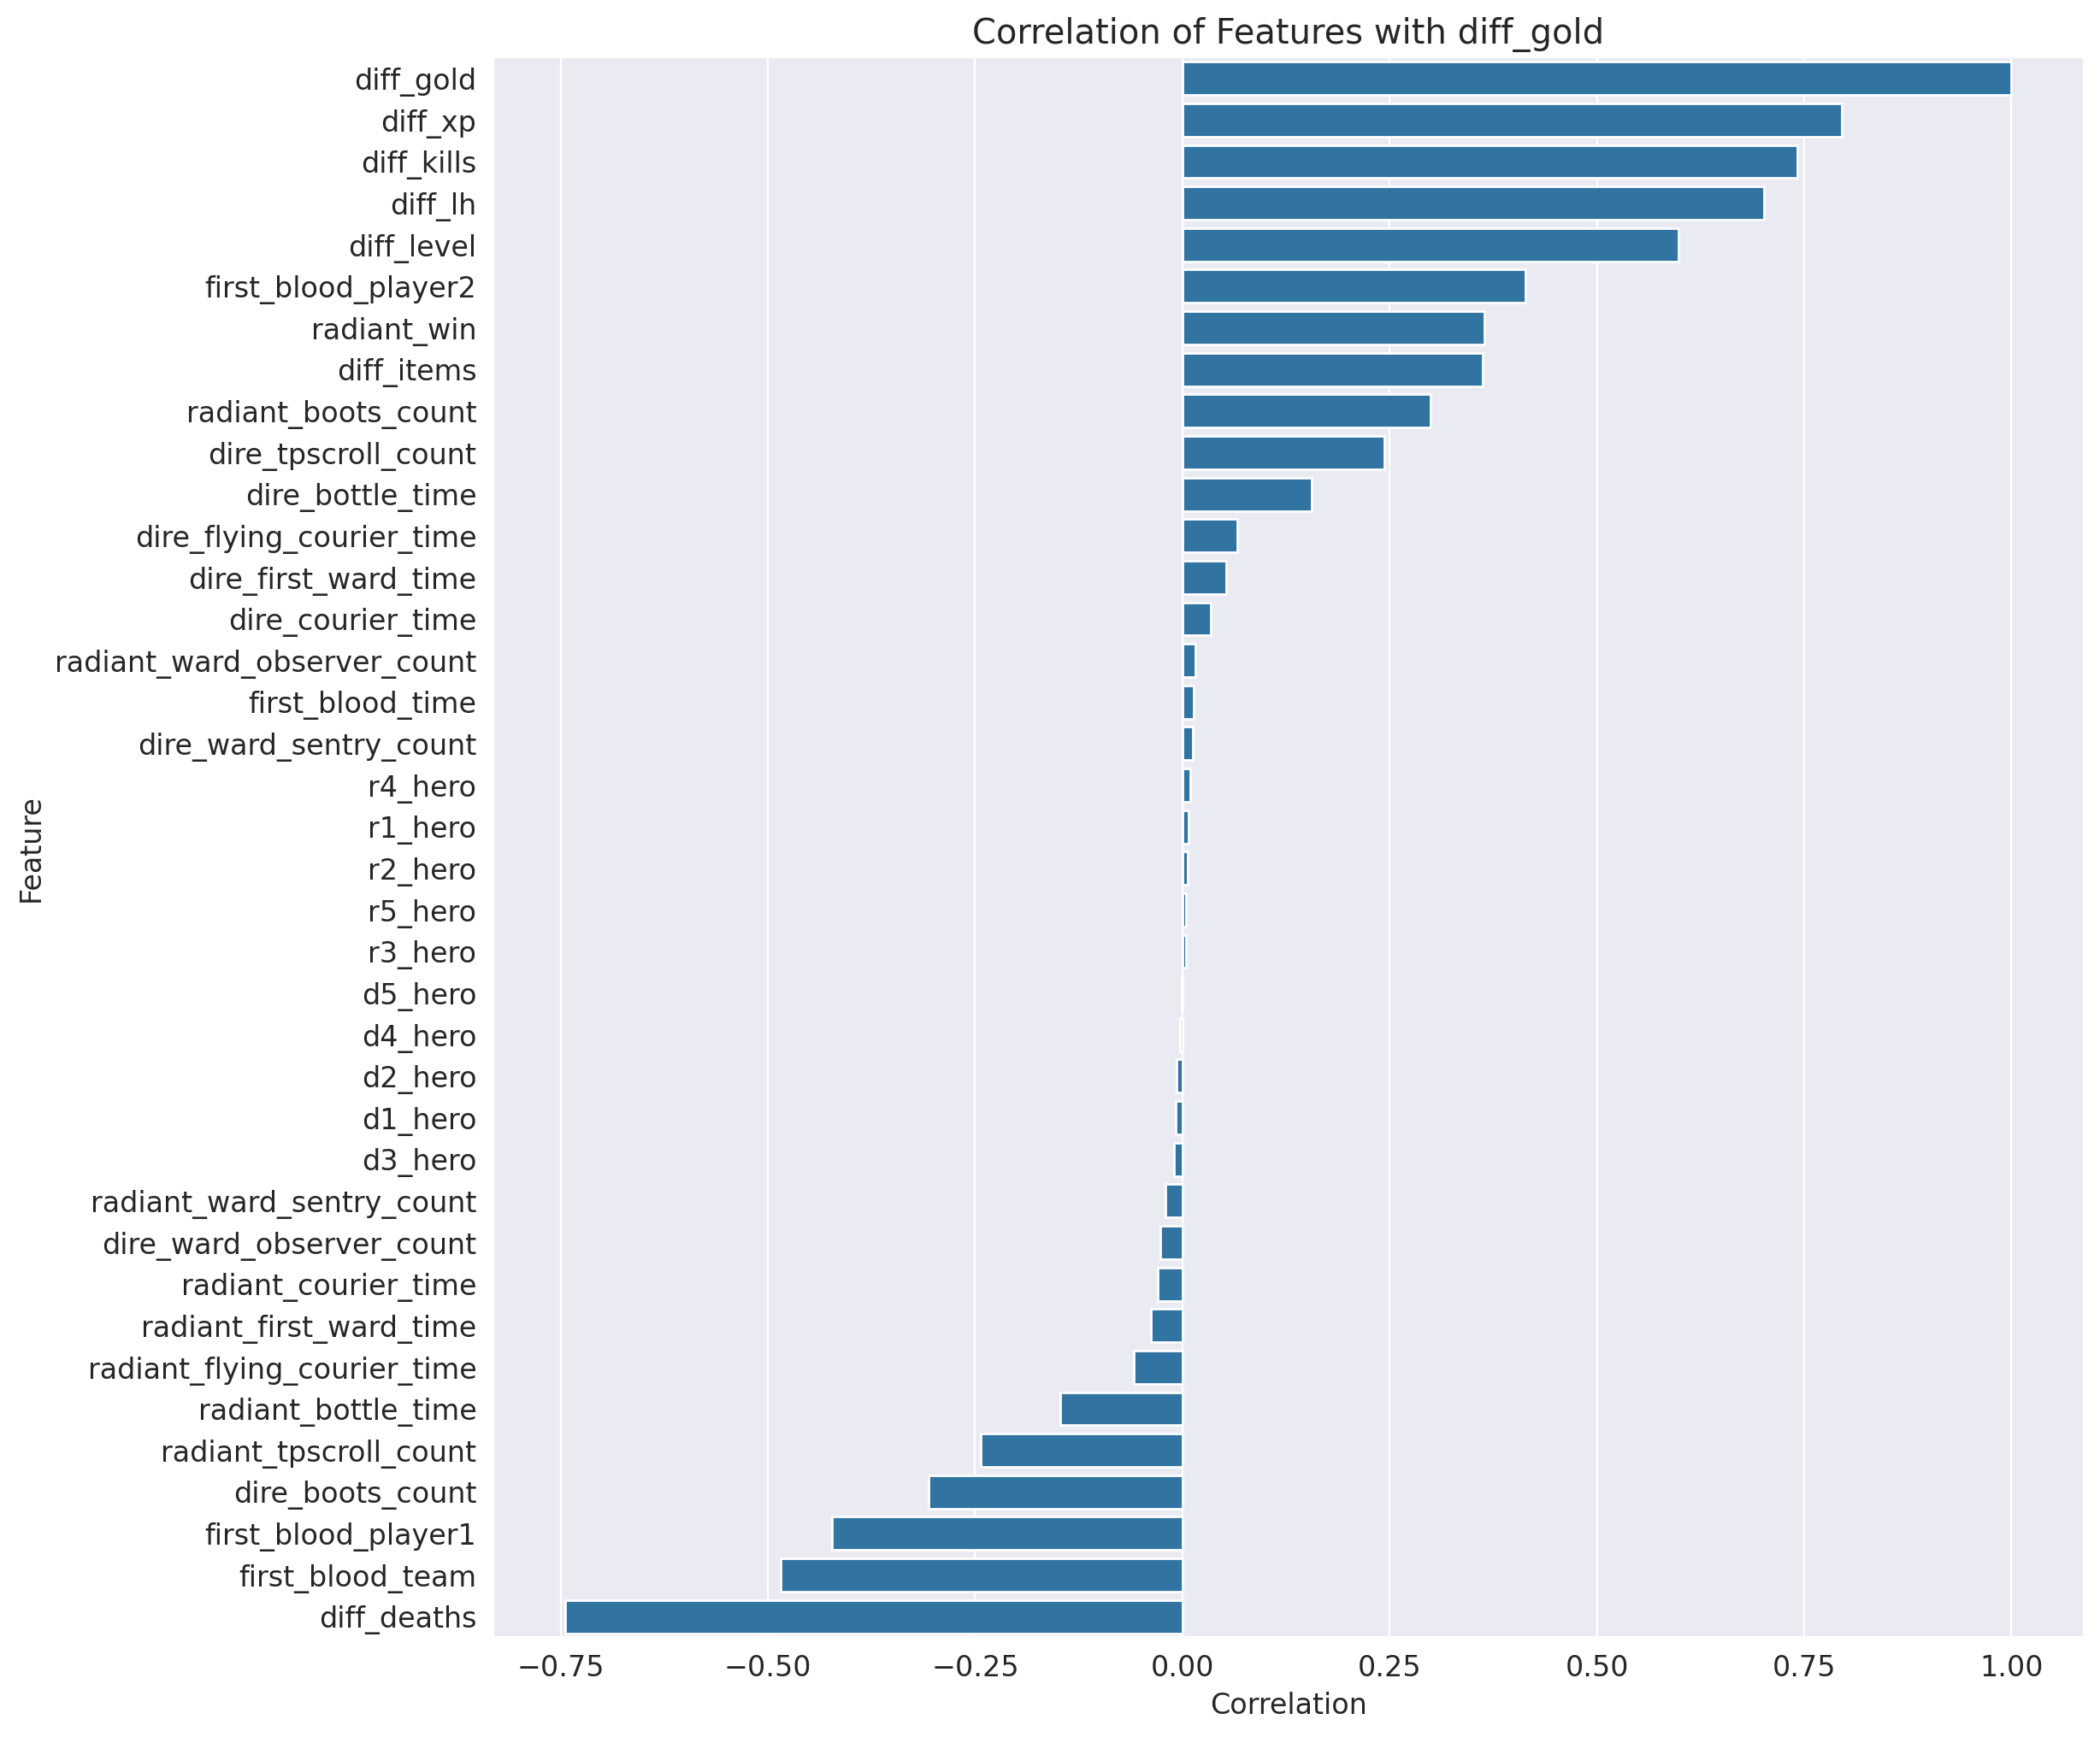

In [104]:
correlation = features.corrwith(features["diff_gold"])

correlation_df = pd.DataFrame(
    {"Feature": correlation.index, "Correlation": correlation.values}
)

correlation_df_sorted = correlation_df.sort_values(by="Correlation", ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x="Correlation", y="Feature", data=correlation_df_sorted, orient="h")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Features with diff_gold")
plt.show()

На основании этих графиков было решено исключить из рассмотрения diff_xp поскольку он сильно коррелирует с 2 признаками. Кроме того, мы убираем first_blood_player1/2, поскольку мы уже выкинули всю информацию об отдельных игроках, а персонажей закодируем с помощью мешка слов, и таким образом избавившись от привязки персонажа к номеру игрока.

In [105]:
features = features.drop(
    [
        "diff_xp",
        "first_blood_player1",
        "first_blood_player2",
    ],
    axis=1,
)

Следующим шагом заполняем пропуски (NaN). Сперва заменяем first_blood_team на среденее возможное значение этошо параметра, так чтобы максимаьно уменьшить влияние при его отсутствии.

In [106]:
features["first_blood_team"] = features["first_blood_team"].fillna(0.5)

Теперь заполняем все оставшиеся колонки. Заметим, что остались только колонки, содержащие информацию о времени. Мы используем статическое значение 600 сек, что соответствует 10ой минуте - то есть в 2 раза позже промежутка, по которому делается предсказание.

In [107]:
features = features.fillna(600)

Проверка, что не осталось NaN'ов

In [108]:
features.isna().sum()

r1_hero                        0
r2_hero                        0
r3_hero                        0
r4_hero                        0
r5_hero                        0
d1_hero                        0
d2_hero                        0
d3_hero                        0
d4_hero                        0
d5_hero                        0
first_blood_time               0
first_blood_team               0
radiant_bottle_time            0
radiant_courier_time           0
radiant_flying_courier_time    0
radiant_tpscroll_count         0
radiant_boots_count            0
radiant_ward_observer_count    0
radiant_ward_sentry_count      0
radiant_first_ward_time        0
dire_bottle_time               0
dire_courier_time              0
dire_flying_courier_time       0
dire_tpscroll_count            0
dire_boots_count               0
dire_ward_observer_count       0
dire_ward_sentry_count         0
dire_first_ward_time           0
radiant_win                    0
diff_gold                      0
diff_lh   

Снова строим корреляцию победы команды (radiant) от всех признаков, чтобы посмотреть на изменение картины

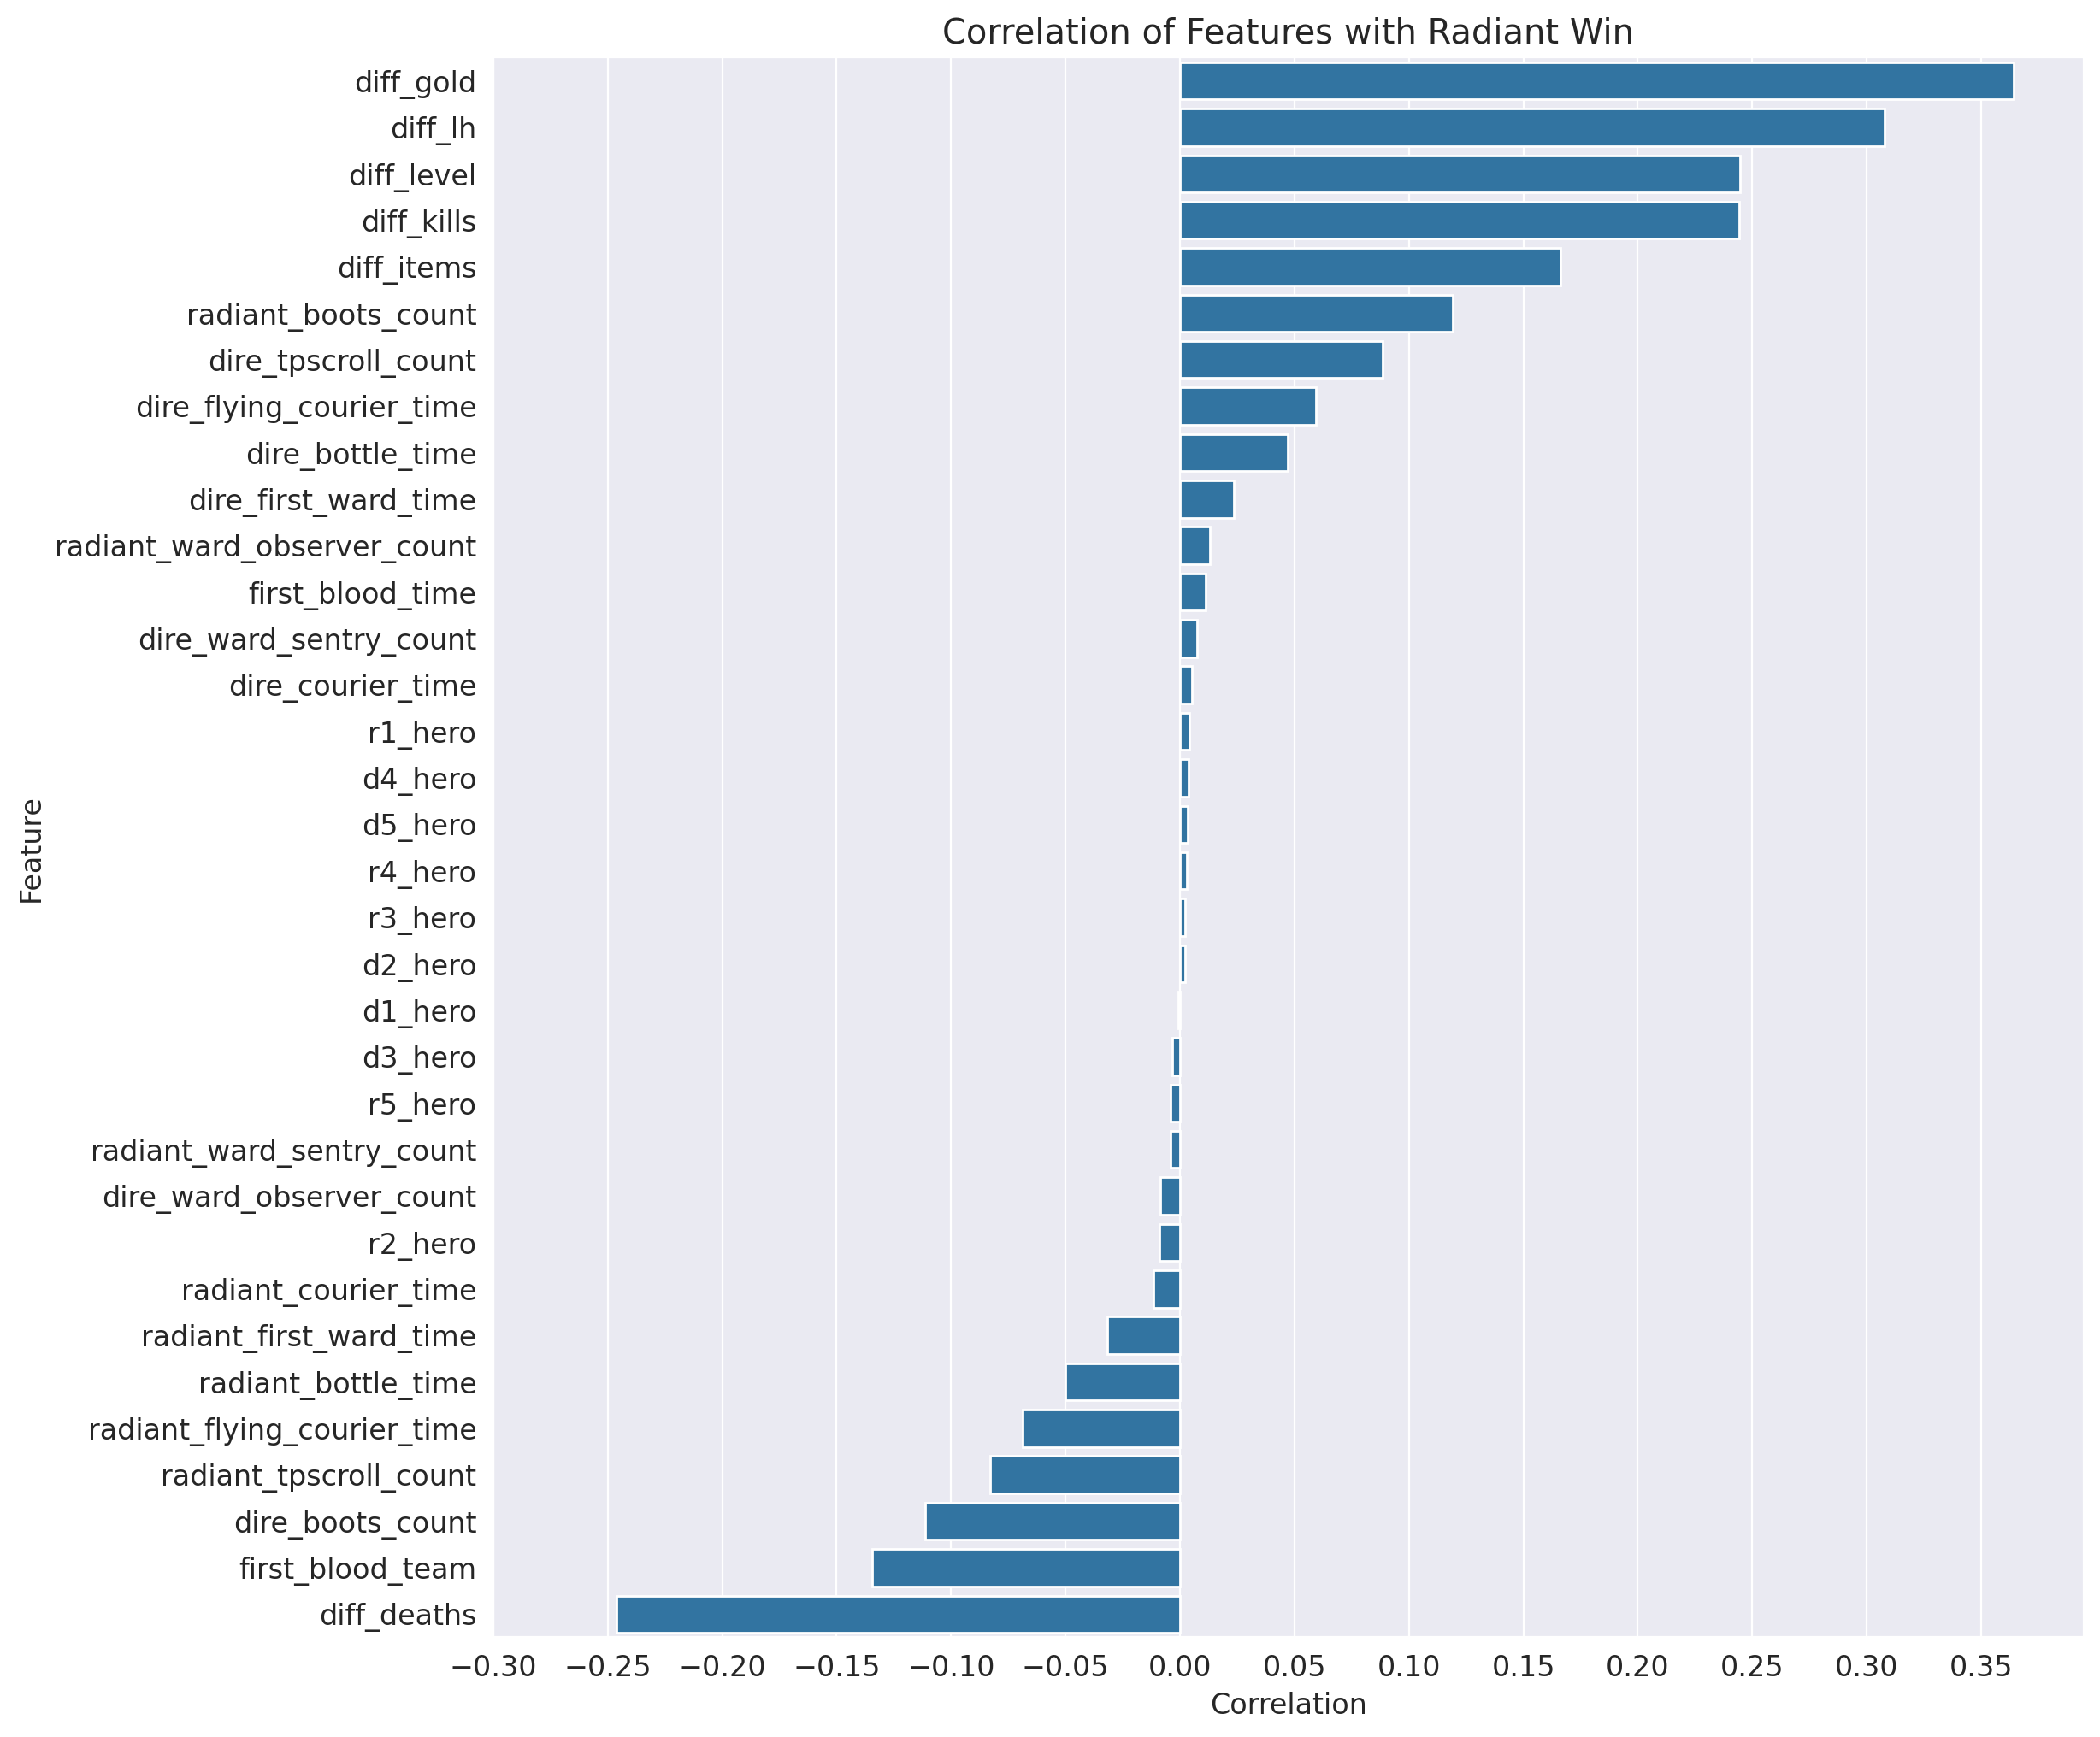

In [109]:
# Вычисление корреляции между признаками и столбцом 'radiant_win'
correlation = features.drop(["radiant_win"], axis=1).corrwith(features["radiant_win"])

correlation_df = pd.DataFrame(
    {"Feature": correlation.index, "Correlation": correlation.values}
)

correlation_df_sorted = correlation_df.sort_values(by="Correlation", ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x="Correlation", y="Feature", data=correlation_df_sorted, orient="h")
plt.xticks([i * 0.05 for i in range(-6, 8)])
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title("Correlation of Features with Radiant Win")
plt.show()

На основе этого графика оставляем только признаки, которые коррелируют с победой более чем на 0.05.

In [110]:
features = features.drop(
    [
        "radiant_first_ward_time",
        "dire_ward_observer_count",
        "radiant_ward_sentry_count",
        "dire_courier_time",
        "dire_ward_sentry_count",
        "first_blood_time",
        "radiant_ward_observer_count",
        "dire_first_ward_time",
        "dire_bottle_time",
    ],
    axis=1,
)

Следующим блоком преобразуем категориальный признак персонажей игроков с помощью мешка слов.

In [111]:
from sklearn.feature_extraction.text import CountVectorizer


def convert_heroes_to_bag_of_words_by_team(df, radiant_hero_columns, dire_hero_columns):
    # Функция для преобразования списка героев в "мешок слов"
    def heroes_to_bow(hero_columns):
        heroes_str = df[hero_columns].apply(
            lambda row: " ".join(row.values.astype(str)), axis=1
        )
        vectorizer = CountVectorizer()
        return pd.DataFrame(
            vectorizer.fit_transform(heroes_str).toarray(),
            columns=vectorizer.get_feature_names_out(),
            index=df.index,
        )

    # Создаем "мешок слов" для каждой команды
    radiant_bow = heroes_to_bow(radiant_hero_columns)
    radiant_bow = radiant_bow.add_prefix("radiant_")

    dire_bow = heroes_to_bow(dire_hero_columns)
    dire_bow = dire_bow.add_prefix("dire_")

    # Удаляем исходные столбцы героев
    df.drop(radiant_hero_columns + dire_hero_columns, axis=1, inplace=True)

    # Объединяем DataFrame с "мешками слов" обеих команд
    return pd.concat([df, radiant_bow, dire_bow], axis=1)


radiant_hero_columns = [f"r{i}_hero" for i in range(1, 6)]
dire_hero_columns = [f"d{i}_hero" for i in range(1, 6)]


features = convert_heroes_to_bag_of_words_by_team(
    features, radiant_hero_columns, dire_hero_columns
)

Выводим полученный датасет, который будет обработан в последующих частях задания

In [112]:
features

,first_blood_team,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,radiant_win,...,dire_90,dire_91,dire_92,dire_93,dire_94,dire_95,dire_96,dire_97,dire_98,dire_99
match_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,134.0,-80.0,244.0,2,2,221.0,3,4,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,173.0,-80.0,600.0,2,0,195.0,5,4,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,63.0,-82.0,600.0,2,5,221.0,3,4,0,...,0,0,0,0,0,0,0,0,0,0
3,0.5,208.0,-75.0,600.0,0,3,184.0,0,4,0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,166.0,-81.0,181.0,1,4,225.0,6,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,0.0,245.0,-86.0,211.0,5,2,180.0,3,4,0,...,0,0,0,1,0,0,0,0,0,0
114403,1.0,139.0,-85.0,202.0,5,3,600.0,4,3,1,...,0,0,0,0,0,0,0,0,1,0
114404,0.0,43.0,-83.0,181.0,2,4,600.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Обучение
С подготовкой данных закончили. Теперь переходим к обучению модели и сопряженных с этим вопросом.

В следующем блоке будет проводится кроссвалидация и GridSearch для модели Логистической регрессии.

In [113]:
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = features.drop("radiant_win", axis=1)
y = features["radiant_win"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Создание модели логистической регрессии
log_reg = LogisticRegression()

# Определение параметров для GridSearch
log_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],  # Добавляем солвер, который поддерживает l1 штраф
}

# Создание объекта GridSearch с использованием AUC-ROC в качестве метрики
log_grid_search = GridSearchCV(
    log_reg, log_param_grid, cv=5, scoring=make_scorer(roc_auc_score)
)

start_time = time.time()

log_grid_search.fit(X_train_scaled, y_train)

print("Time elapsed:", time.time() - start_time)
print("Лучшие параметры:", log_grid_search.best_params_)

Time elapsed: 142.24691081047058
Лучшие параметры: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Выше показано измеренное время в соответсвии с заданием, а также лучшие полученные параметры из выбираемых.

Код ниже призван построить ROC кривую для оценки площади под ней (оценки AUC-ROC) по результатам полученной модели.

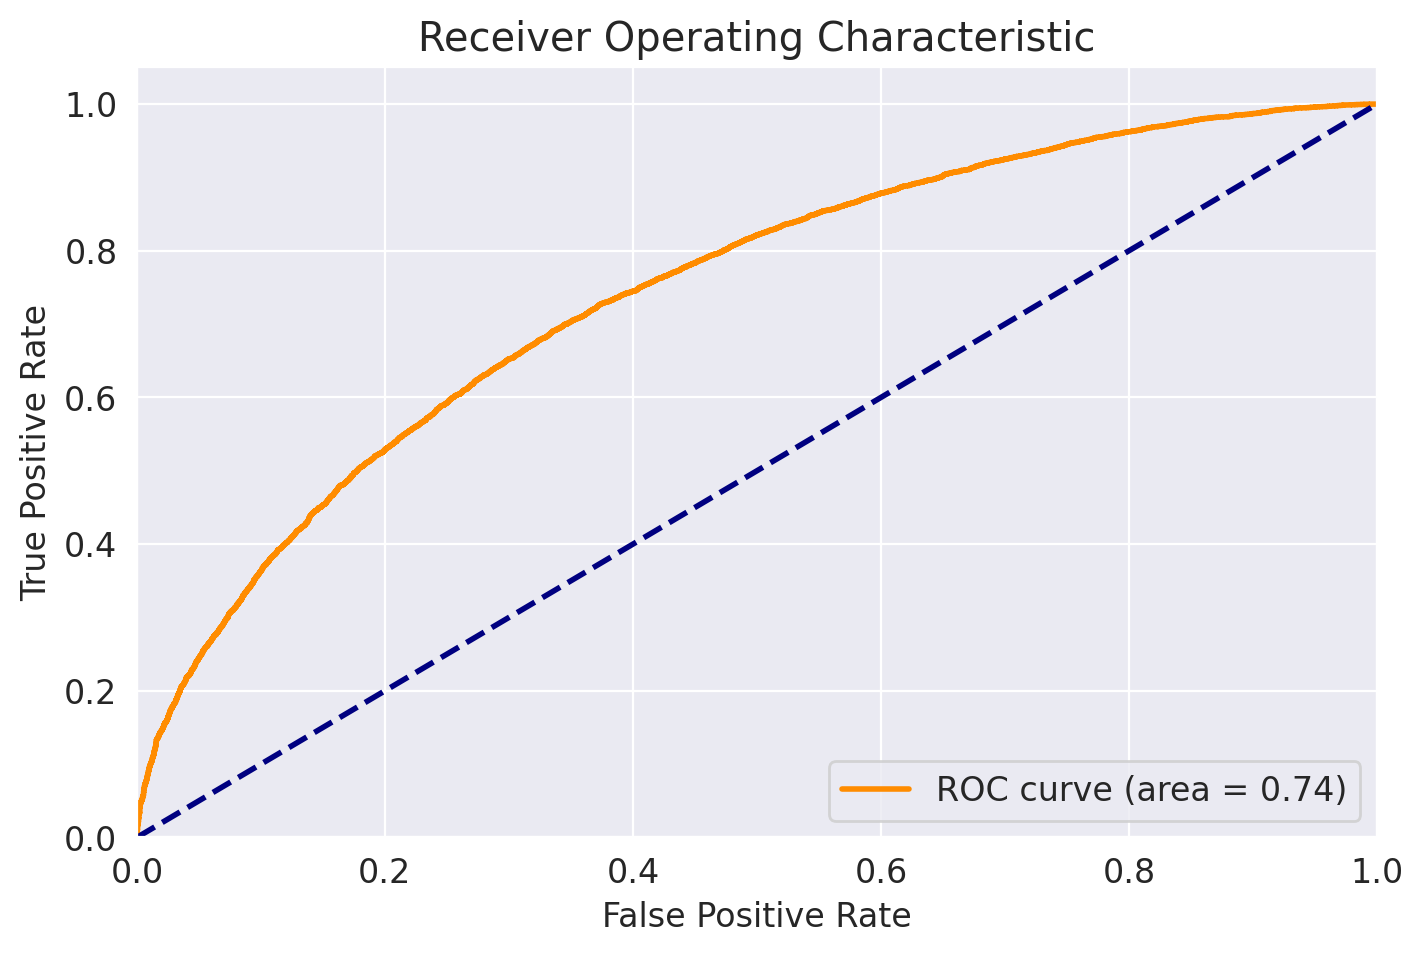

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

# Используем лучшую модель из GridSearch для предсказания вероятностей
log_y_pred_prob = log_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Расчет значений для ROC кривой
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_y_pred_prob)

# Расчет AUC
log_roc_auc = auc(log_fpr, log_tpr)

# Построение ROC кривой
plt.figure()
plt.plot(
    log_fpr,
    log_tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % log_roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

Следующим шагом производится оценка точности полученной модели на тестовой части датасета

In [116]:
import numpy as np


def get_accuracy(x_test, y_test, model, threshold=0.5):
    # Предсказание вероятностей для тестовых данных
    y_pred_prob = model.best_estimator_.predict_proba(x_test)[:, 1]

    # Классификация на основе порога
    y_pred_class = np.where(y_pred_prob >= threshold, 1, 0)

    correct_predictions = np.sum(y_pred_class == y_test)
    total_predictions = len(y_pred_class)
    accuracy = correct_predictions / total_predictions * 100

    print(f"Процент верных срабатываний: {accuracy:.2f}%")

    # Вывод результатов
    for i in range(0, len(y_pred_class), 1000):
        print(
            f"Пример {i}: Предсказанная вероятность = {y_pred_prob[i]:.4f}, Предсказанный класс = {y_pred_class[i]}, Истинный класс = {y_test.iloc[i]}"
        )


start_time = time.time()
get_accuracy(X_test_scaled, y_test, log_grid_search, 0.5)
print("Time elapsed:", time.time() - start_time)

Процент верных срабатываний: 67.75%
Пример 0: Предсказанная вероятность = 0.8804, Предсказанный класс = 1, Истинный класс = 1
Пример 1000: Предсказанная вероятность = 0.8033, Предсказанный класс = 1, Истинный класс = 1
Пример 2000: Предсказанная вероятность = 0.6753, Предсказанный класс = 1, Истинный класс = 1
Пример 3000: Предсказанная вероятность = 0.5238, Предсказанный класс = 1, Истинный класс = 0
Пример 4000: Предсказанная вероятность = 0.5095, Предсказанный класс = 1, Истинный класс = 0
Пример 5000: Предсказанная вероятность = 0.6750, Предсказанный класс = 1, Истинный класс = 1
Пример 6000: Предсказанная вероятность = 0.7299, Предсказанный класс = 1, Истинный класс = 1
Пример 7000: Предсказанная вероятность = 0.8160, Предсказанный класс = 1, Истинный класс = 1
Пример 8000: Предсказанная вероятность = 0.8048, Предсказанный класс = 1, Истинный класс = 0
Пример 9000: Предсказанная вероятность = 0.2658, Предсказанный класс = 0, Истинный класс = 0
Пример 10000: Предсказанная вероятнос

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Создание модели RandomForest
random_forest = RandomForestClassifier()

forest_param_grid = {
    "n_estimators": [10, 50, 100],  # количество деревьев
    "max_depth": [1, 5, 10],  # максимальная глубина деревьев
    "min_samples_split": [2, 5, 10],  # минимальное количество объектов, необходимое для разделения узла
}


forest_grid_search = GridSearchCV(
    random_forest, forest_param_grid, cv=5, scoring=make_scorer(roc_auc_score)
)

start_time = time.time()

forest_grid_search.fit(X_train_scaled, y_train)

print("Time elapsed:", time.time() - start_time)
print("Лучшие параметры:", forest_grid_search.best_params_)

Time elapsed: 176.22538828849792
Лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


Выше показано измеренное время в соответсвии с заданием, а также лучшие полученные параметры из выбираемых.

Код ниже призван построить ROC кривую для оценки площади под ней (оценки AUC-ROC) по результатам полученной модели.

AUC-ROC: 0.7163527727023523


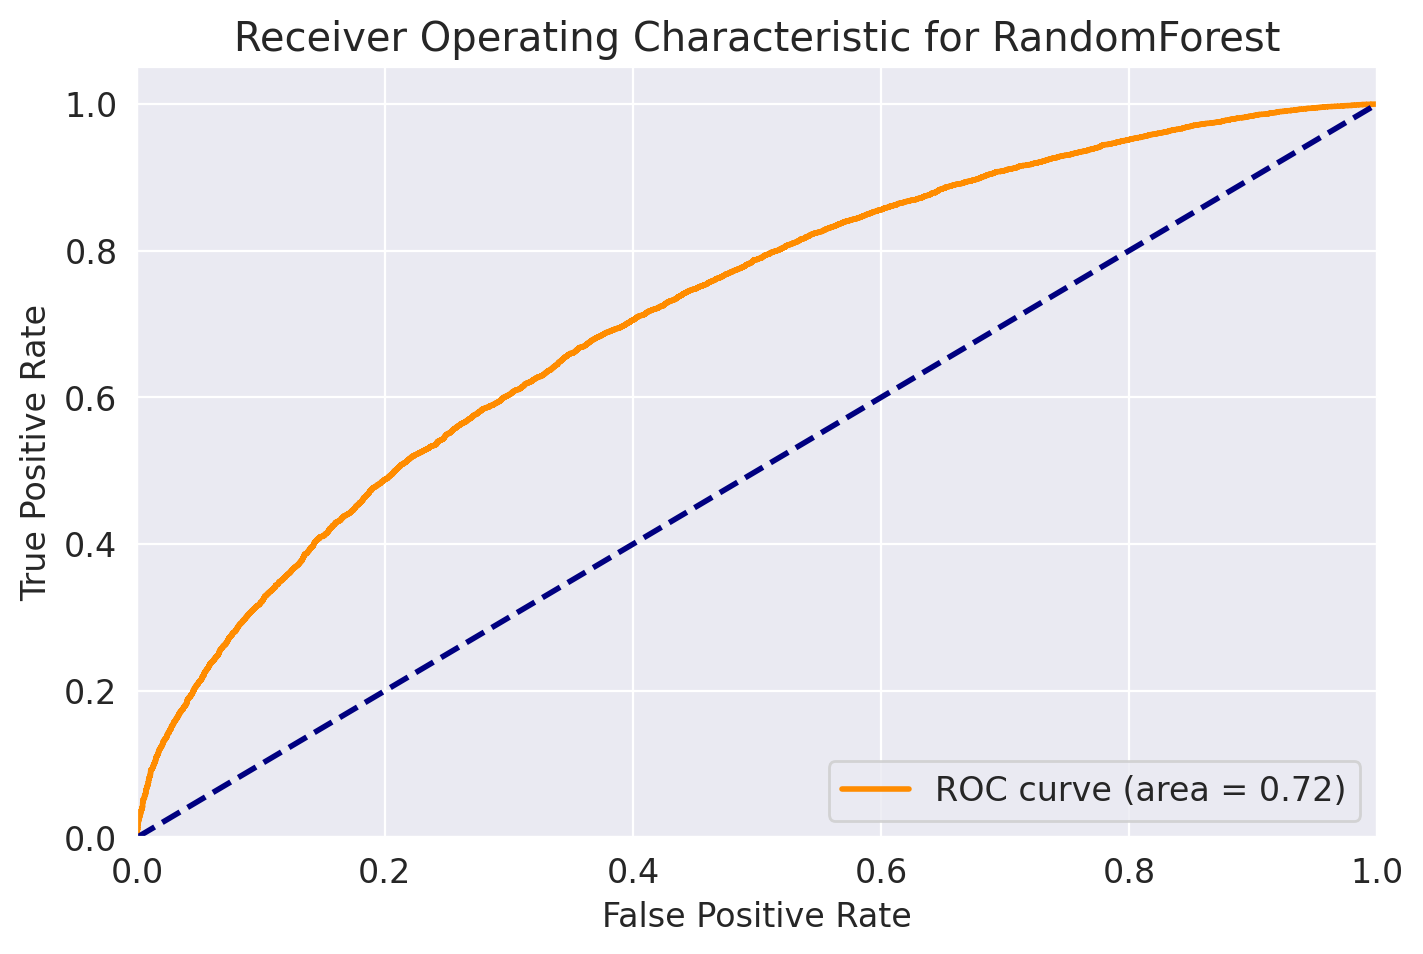

In [118]:
# Предсказание вероятностей на тестовых данных
forest_y_pred_prob = forest_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Расчет значений для ROC кривой
forest_fpr, forest_tpr, forest_thresholds = roc_curve(y_test, forest_y_pred_prob)

# Расчет AUC-ROC
forest_roc_auc = auc(forest_fpr, forest_tpr)
print("AUC-ROC:", forest_roc_auc)

plt.figure()
plt.plot(
    forest_fpr,
    forest_tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % forest_roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for RandomForest")
plt.legend(loc="lower right")
plt.show()

Следующим шагом производится оценка точности полученной модели на тестовой части датасета

In [119]:
start_time = time.time()
get_accuracy(X_test_scaled, y_test, forest_grid_search, 0.5)
print("Time elapsed:", time.time() - start_time)

Процент верных срабатываний: 65.63%
Пример 0: Предсказанная вероятность = 0.7448, Предсказанный класс = 1, Истинный класс = 1
Пример 1000: Предсказанная вероятность = 0.5515, Предсказанный класс = 1, Истинный класс = 1
Пример 2000: Предсказанная вероятность = 0.6478, Предсказанный класс = 1, Истинный класс = 1
Пример 3000: Предсказанная вероятность = 0.5030, Предсказанный класс = 1, Истинный класс = 0
Пример 4000: Предсказанная вероятность = 0.6183, Предсказанный класс = 1, Истинный класс = 0
Пример 5000: Предсказанная вероятность = 0.6994, Предсказанный класс = 1, Истинный класс = 1
Пример 6000: Предсказанная вероятность = 0.6710, Предсказанный класс = 1, Истинный класс = 1
Пример 7000: Предсказанная вероятность = 0.5884, Предсказанный класс = 1, Истинный класс = 1
Пример 8000: Предсказанная вероятность = 0.6684, Предсказанный класс = 1, Истинный класс = 0
Пример 9000: Предсказанная вероятность = 0.3083, Предсказанный класс = 0, Истинный класс = 0
Пример 10000: Предсказанная вероятнос

На всякий случай проверяем, не получилась ли модели (лучшая - LogReg) константной.

In [120]:
# Проверка, что предсказанные вероятности находятся в диапазоне от 0 до 1
print("Вероятности в диапазоне от 0 до 1:", all(0 <= p <= 1 for p in log_y_pred_prob))

# Проверка, что модель не является константной (вероятности не совпадают между собой)
print("Модель не является константной:", len(set(log_y_pred_prob)) > 1)

Вероятности в диапазоне от 0 до 1: True
Модель не является константной: True


Далее для лучшей модели строим Confusion Matrix

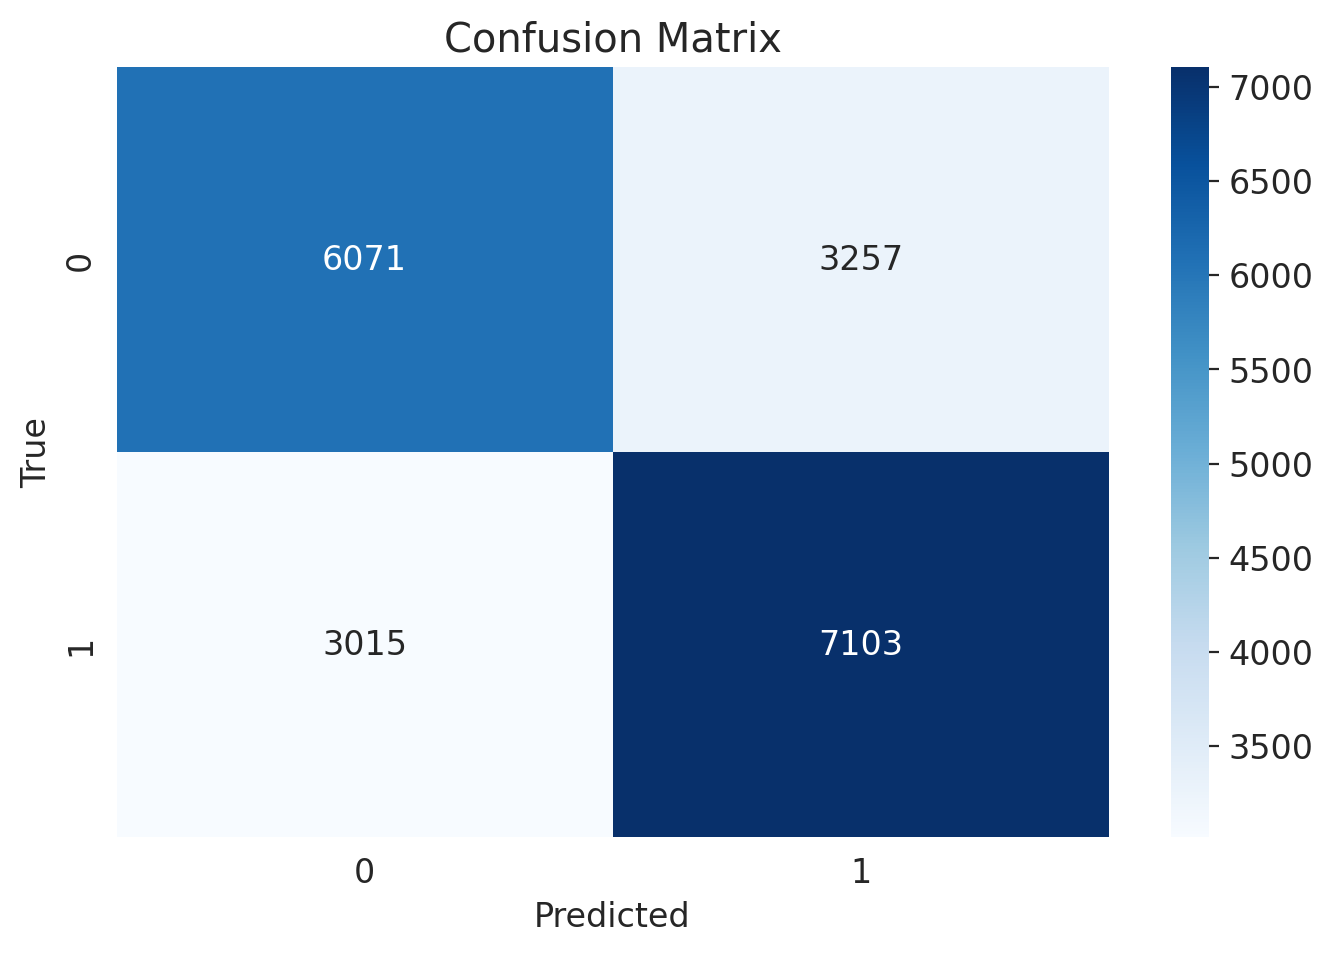

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Получение предсказаний модели
y_pred = log_grid_search.best_estimator_.predict(X_test_scaled)

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Блок ниже позволяет построить Precicion/Recall/F1-score в зависимости от Treshold (и PRC для себя) и найден лучший порог для максимизации F1.

По нему можно ответить на вопрос, как порог влияет на Precision и Recall. С его ростом Precision также увеличивается, в то время как Recall уменьшается.

Максимальный F1 Score: 0.7226491771617108, Порог: 0.3470442892691786


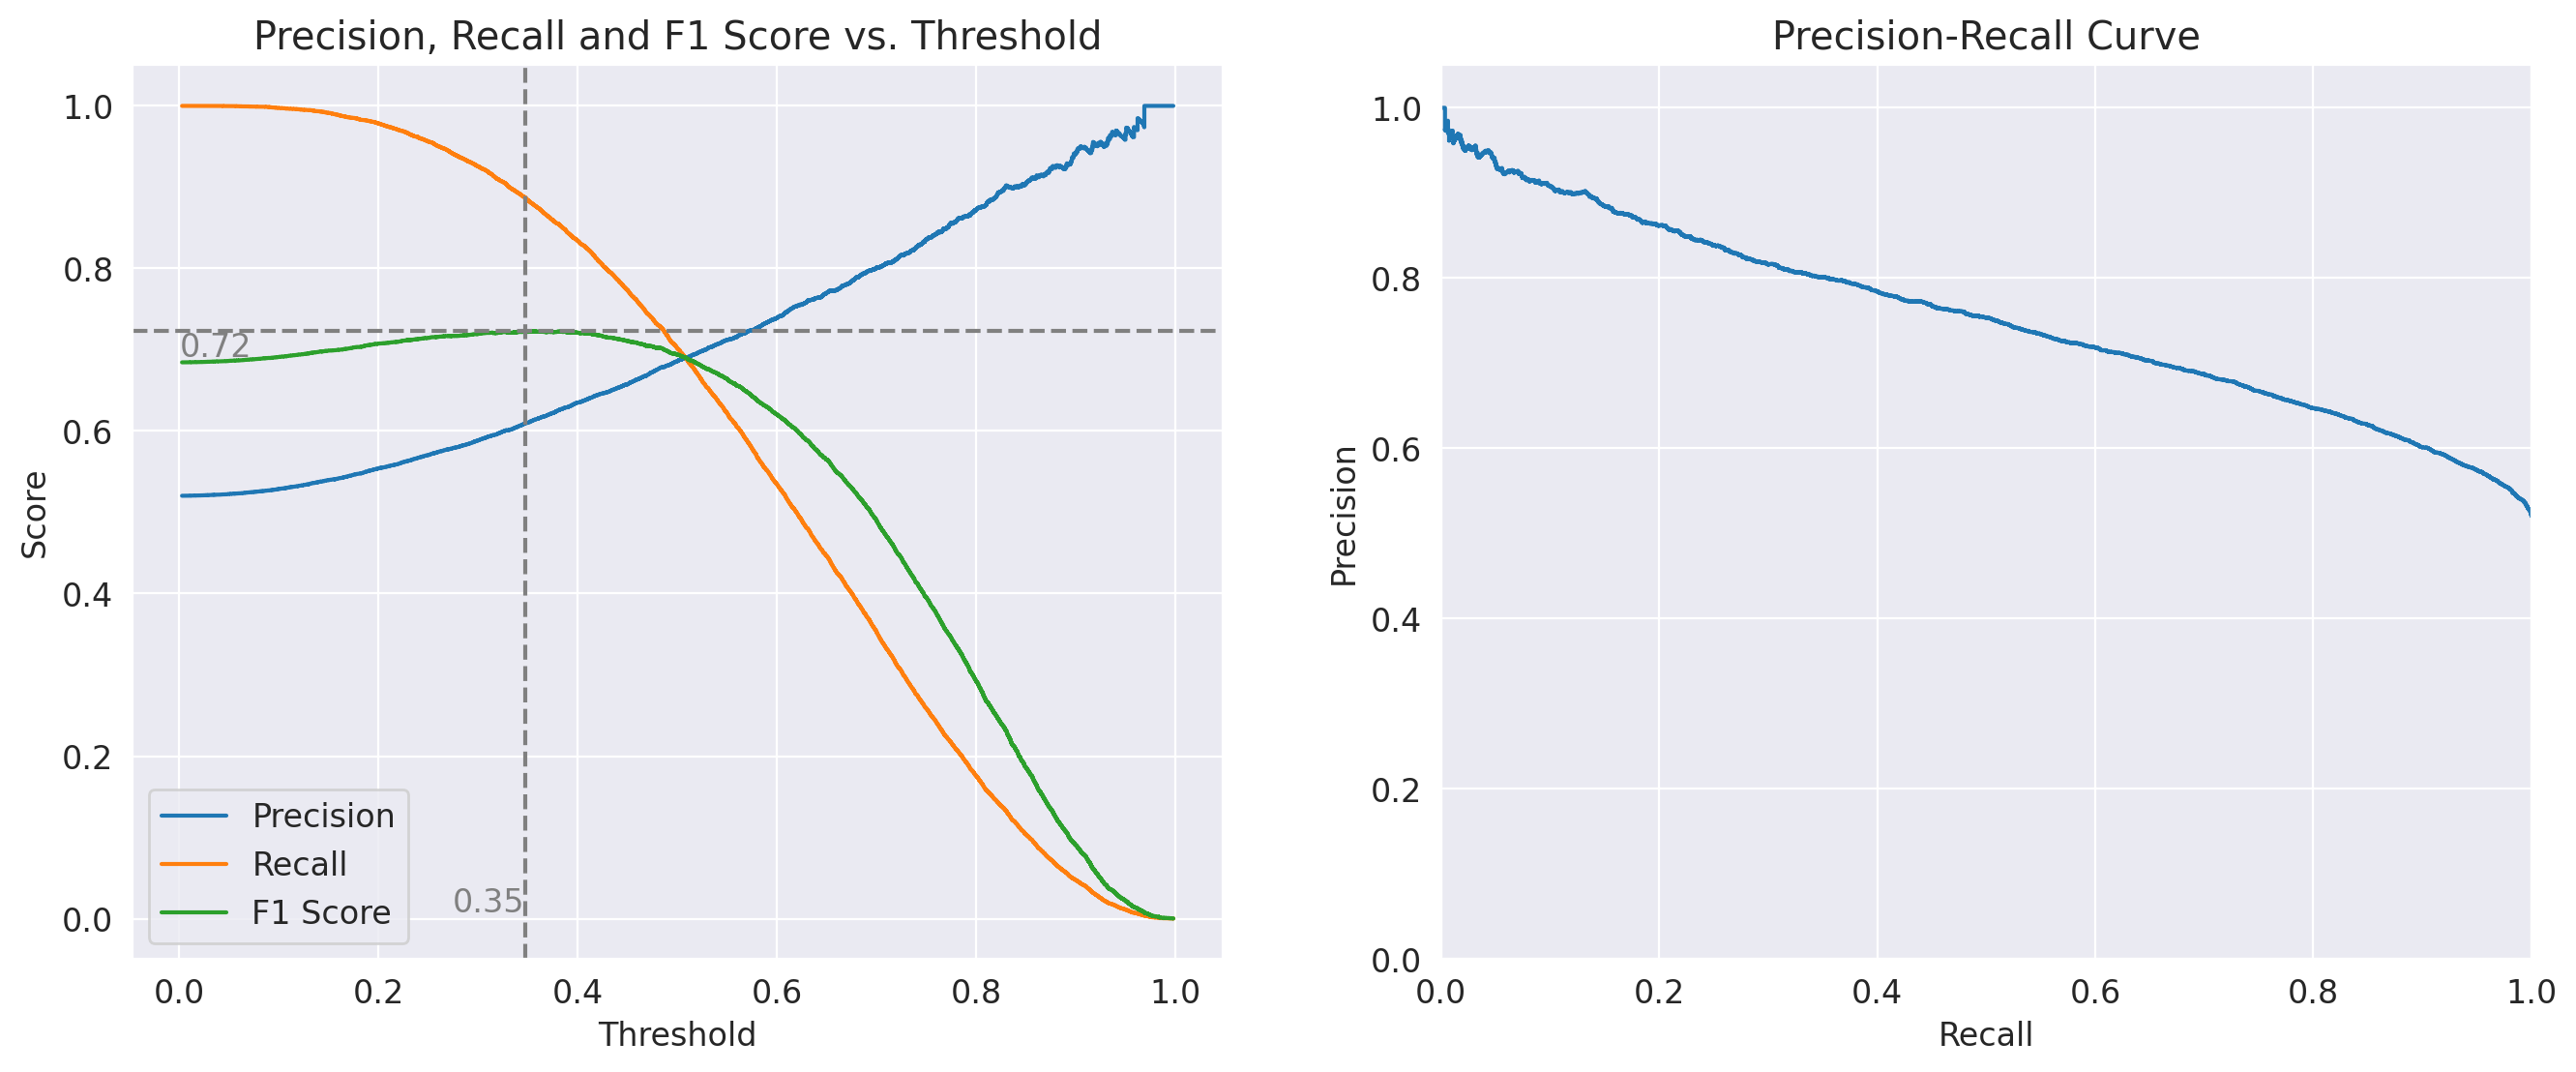

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, f1_score, precision_recall_curve

# Расчет точности (precision) и полноты (recall) для различных порогов
precision, recall, thresholds = precision_recall_curve(y_test, log_y_pred_prob)

# Расчет F1-Score для каждого порога
precision = precision[:-1]
recall = recall[:-1]

# Расчет F1-Score для каждого порога
f1_scores = 2 * (precision * recall) / (precision + recall)

# Устранение NaN значений
f1_scores = np.nan_to_num(f1_scores)

# Нахождение максимального значения F1 и соответствующего порога
max_f1_index = np.argmax(f1_scores)
max_f1_score = f1_scores[max_f1_index]
max_f1_threshold = thresholds[max_f1_index]

print(f"Максимальный F1 Score: {max_f1_score}, Порог: {max_f1_threshold}")

plt.figure(figsize=(16, 6))

# Первый график: Precision, Recall и F1-Score в зависимости от порога
plt.subplot(1, 2, 1)
plt.plot(thresholds, precision, label="Precision", drawstyle="steps-post")
plt.plot(thresholds, recall, label="Recall", drawstyle="steps-post")
plt.plot(thresholds, f1_scores, label="F1 Score", drawstyle="steps-post")

plt.axvline(x=max_f1_threshold, color="grey", linestyle="--")
plt.axhline(y=max_f1_score, color="grey", linestyle="--")

# Добавление аннотаций
plt.text(
    max_f1_threshold,
    0,
    f"{max_f1_threshold:.2f}",
    ha="right",
    va="bottom",
    color="grey",
)
plt.text(0, max_f1_score, f"{max_f1_score:.2f}", ha="left", va="top", color="grey")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall and F1 Score vs. Threshold")
plt.legend(loc="best")
plt.grid(True)

# Второй график: PRC
plt.subplot(1, 2, 2)
plt.step(recall, precision, where="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)

plt.show()

Код ниже позволяет проверить Permutation importance для нашей полученной модели. Он заполнен большим количеством почти одинаковых признаков, которые закодировали героев ранее.

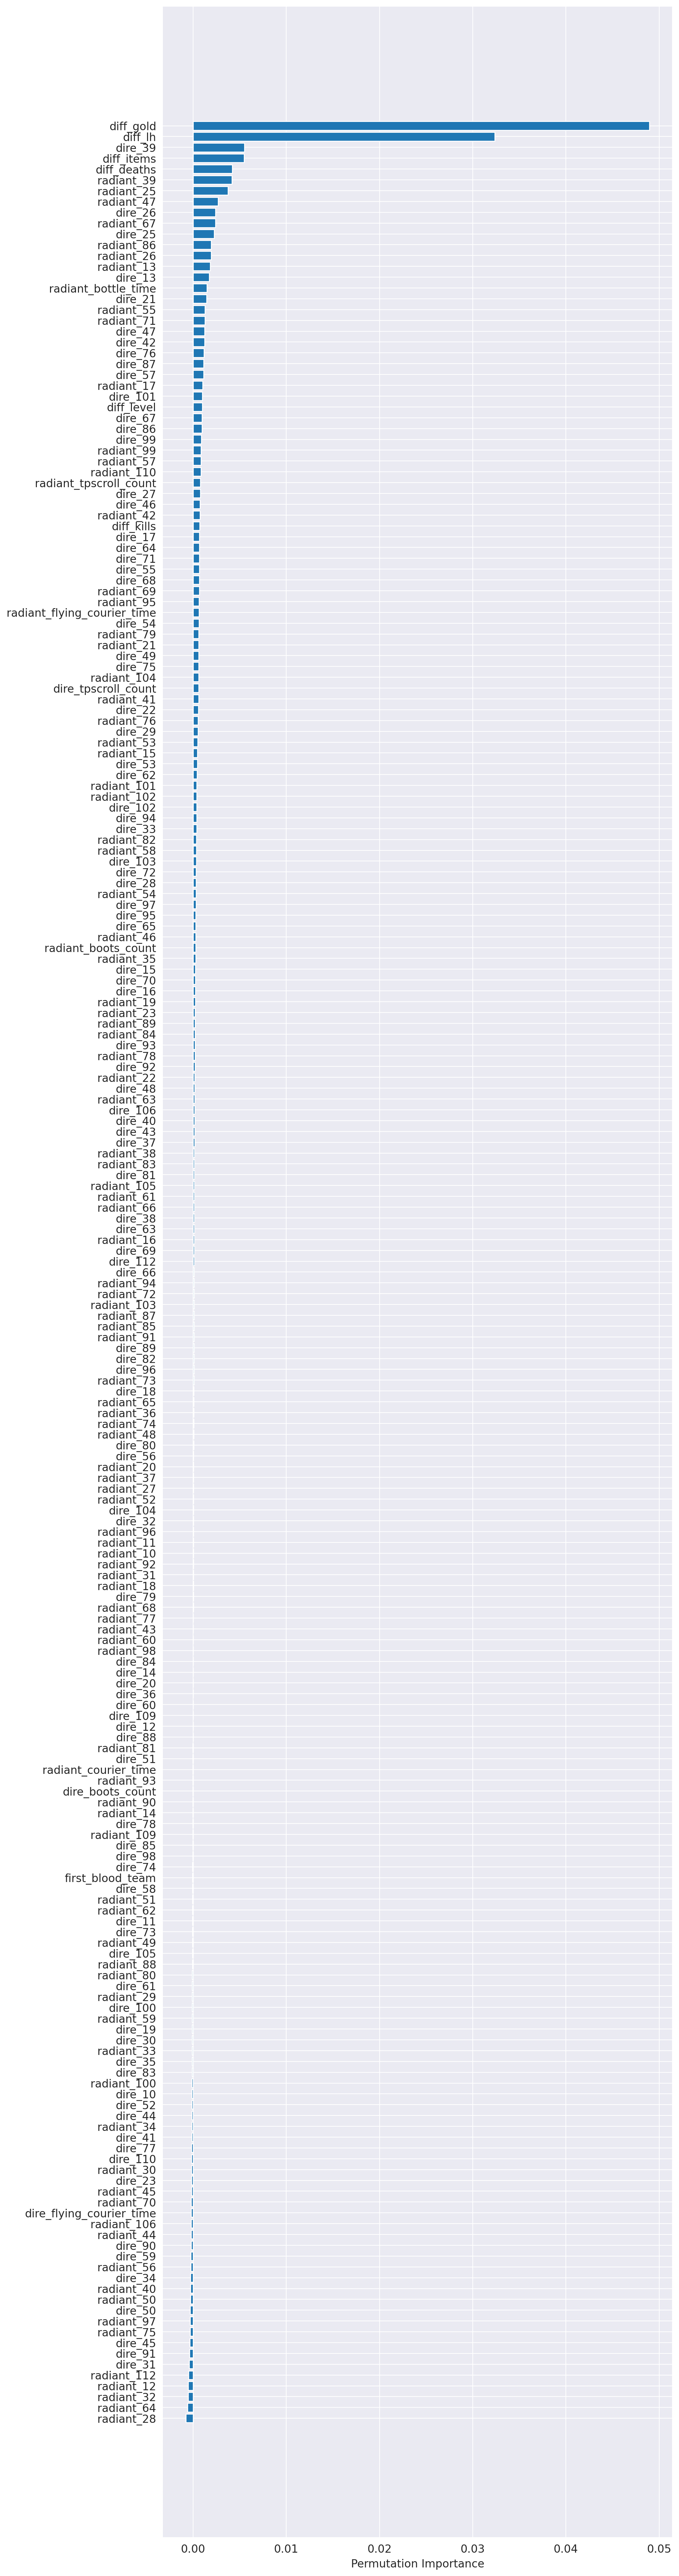

In [123]:
from sklearn.inspection import permutation_importance

# Проведение анализа важности признаков
perm_importance = permutation_importance(log_grid_search, X_test_scaled, y_test)

# Получение индексов признаков по важности
sorted_idx = perm_importance.importances_mean.argsort()

# Визуализация
plt.figure(figsize=(10, 50))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

## Вывод

Итак, по итогам работы можно сделать несколько выводов.

Во-первых, в нашем случае логистическая регрессия оказалась быстрее случайного леса (и в обучении, и на инференсе) - это в целом ожидаемый результат, поскольку в ней обучается одна модель - а не ансамбль. С другой стороны, качество выше также у логистической - вот это уже странно именно из-за ансамблей в лесу. Однако, возможная причина такого отличия в том, что в процессе Feature Engeneering'а мы откинули все признаки, от которых победа линейно зависит слабо - однако, нелинейно она могла от них зависеть сильно.
Кроме того, мы можем утверждать, что именно текущие параметры являются лучшими среди всех возможных. В процессе решения задания мы попробовали множество комбинаций, и оставили лучшие из них.

Во-вторых, AUC-ROC метрика у нашей лучшей модели получилась 74%, что можно принять как достаточно высокую по сравнению со случайной 50% оценкой.

В-третьих, интерпретация признаков модели показала примерно то же самое, что и проверка корреляции победы от признаков в самом начале - нaиболее влияющим на победу модель посчитала разницу команд в золоте (и в Last Hit - которые тоже приносят золото). 